In [1]:
%matplotlib inline
import librosa
import librosa.display
import matplotlib.pyplot as plt
import mdct
import numpy as np
import seaborn as sns
sns.set_style('dark')

from data_utils import mu_law_compression, mu_law_expansion

In [2]:
mdct_lofi = np.load('audio_training/mdct_lofi_stereo.npy')

In [7]:
eps = 1e-8
def specvis(arr):
    plt.figure(figsize=(16, 10))
    plt.imshow(arr, aspect='auto')
    plt.colorbar()

def specvis_stereo(arr):
    fig, axs = plt.subplots(2, 1, figsize=(18, 20))
    left = axs[0].imshow(arr[:, :, 0], label='Left channel', aspect='auto')
    right = axs[1].imshow(arr[:, :, 1], label='Right channel', aspect='auto')
    fig.colorbar(left, ax=axs[0])
    fig.colorbar(right, ax = axs[1])

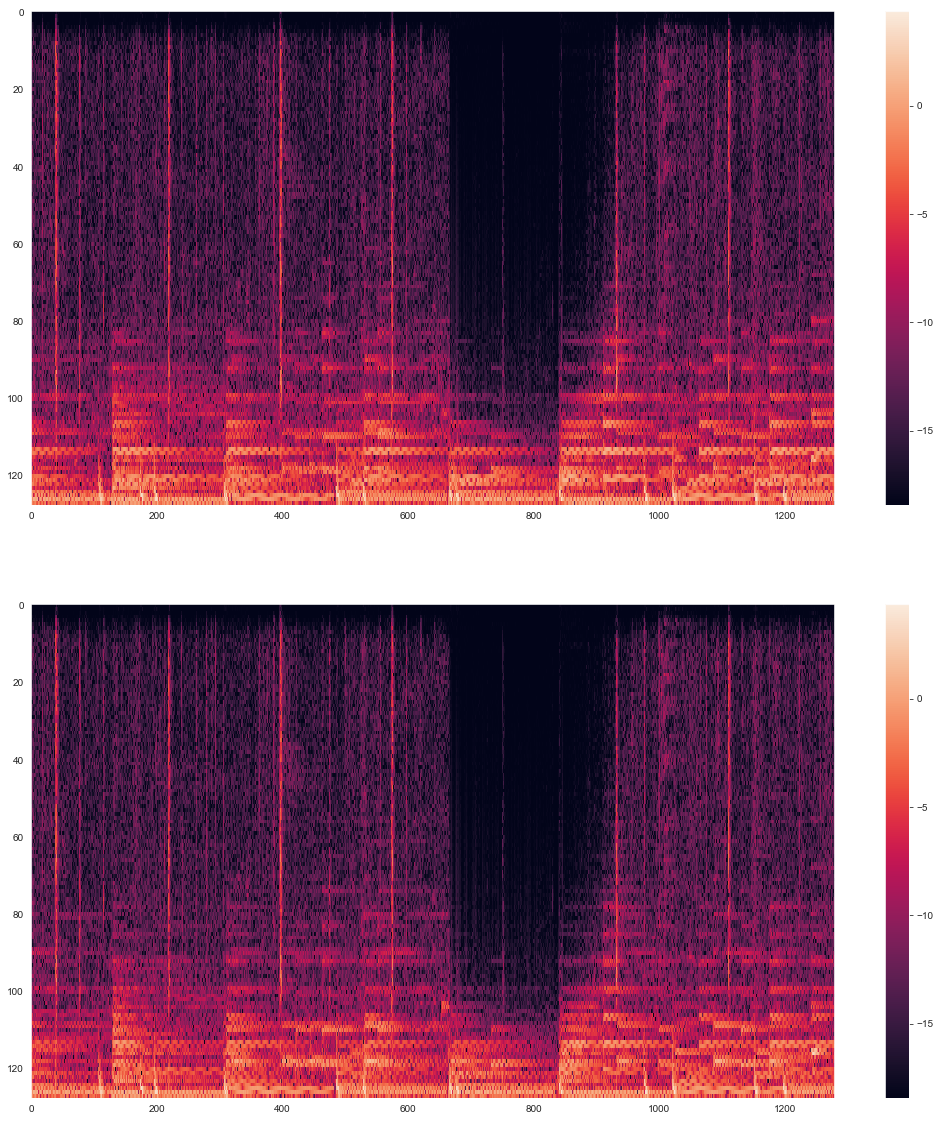

In [8]:
specvis_stereo(np.log(np.power(mdct_lofi[::-1, 2560:3840], 2) + eps))

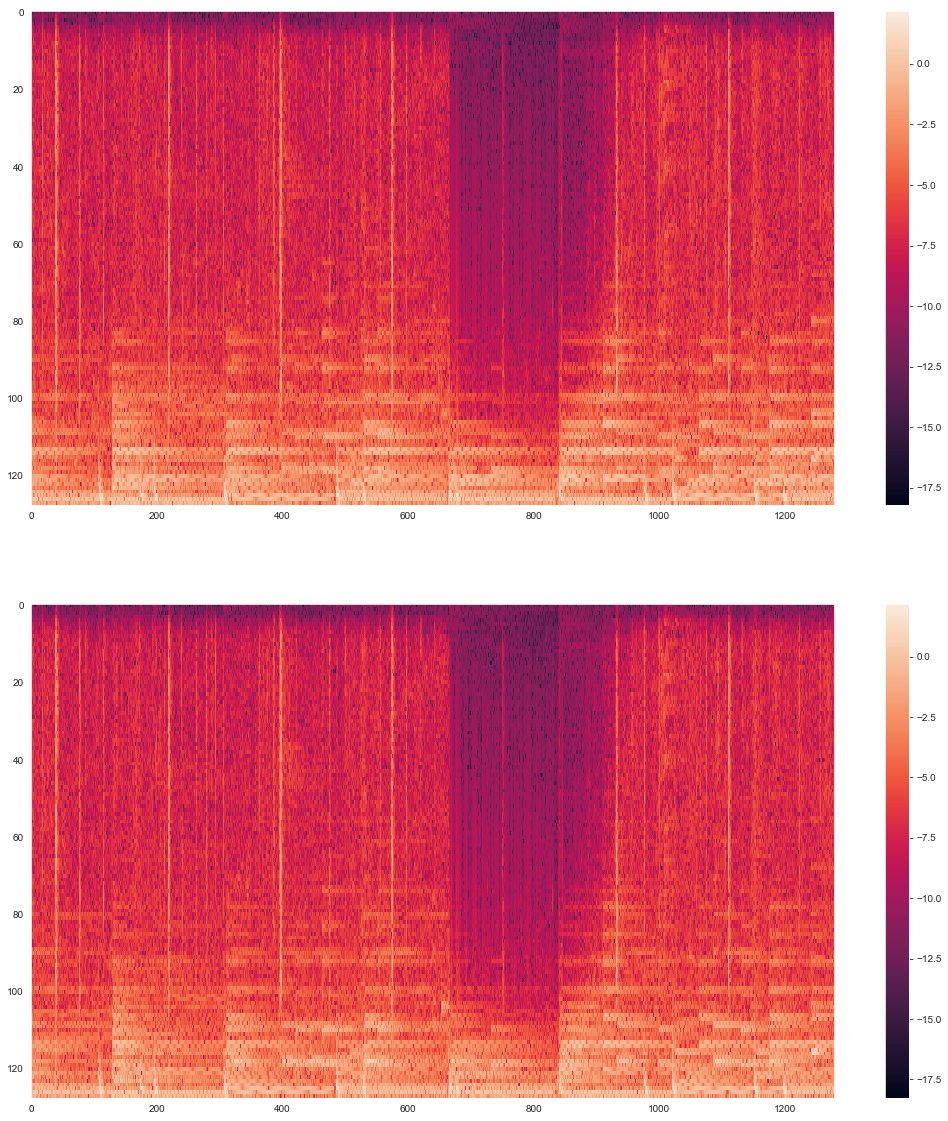

In [9]:
specvis_stereo(np.log(np.absolute(mdct_lofi[::-1, 2560:3840]) + eps))

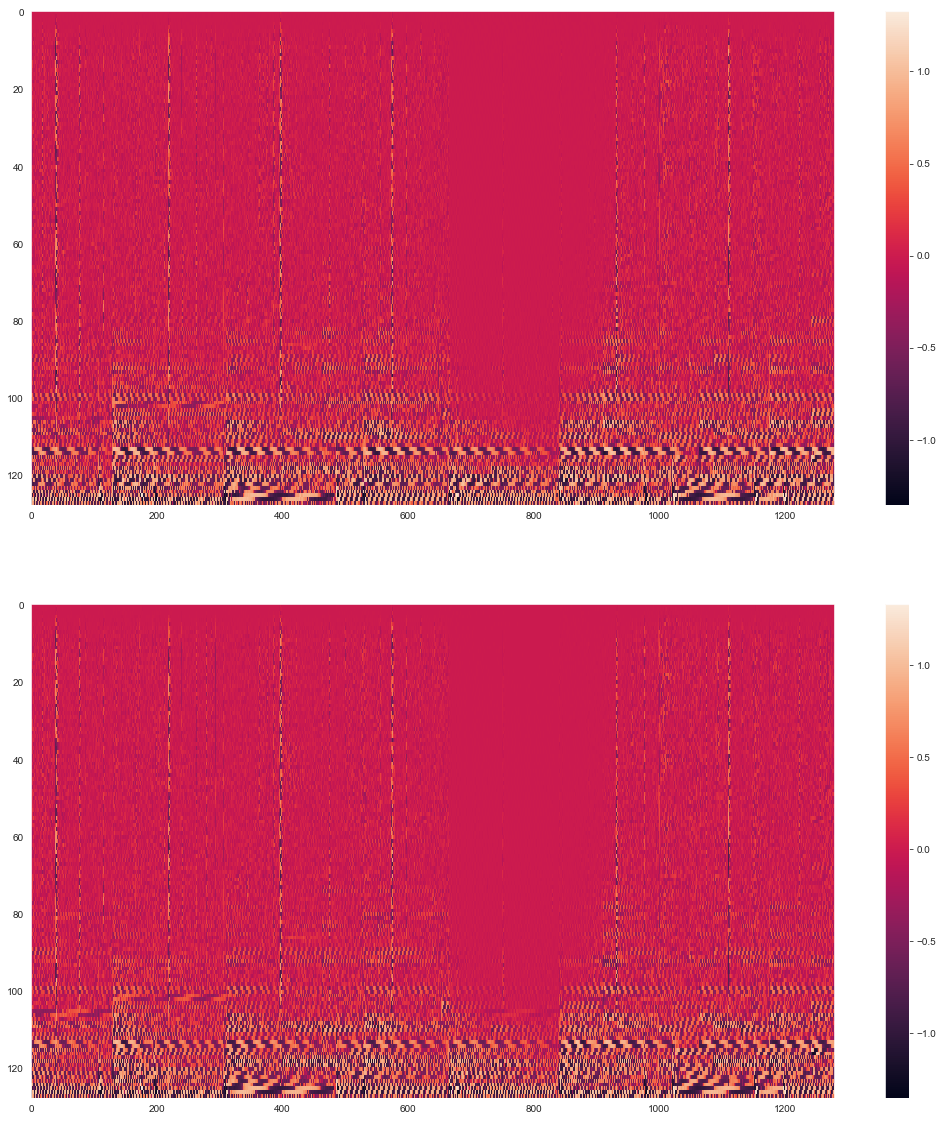

In [10]:
specvis_stereo(mu_law_compression(mdct_lofi[::-1, 2560:3840], mu=511))

Mu-law compression with $\mu=511$ seems to highlight the important features really well! We'll see if this helps the network learn better. Let's make sure that we can invert it reliably (just to make sure).

In [11]:
mdct_mu_lofi = mu_law_compression(mdct_lofi, mu=511)
assert mdct_mu_lofi.dtype == 'float32'

In [12]:
recons = mu_law_expansion(mdct_mu_lofi, mu=511)
assert recons.dtype == 'float32'

In [14]:
good_reconstruction = np.allclose(mdct_lofi, recons)
print(f'It is {good_reconstruction} that we can trust the invertibility of mu-law companding.')

It is True that we can trust the invertibility of mu-law companding.


Yay! So let's save it to disk.

In [15]:
np.save('audio_training/mdct_mu_lofi_stereo.npy', mdct_mu_lofi)

Again, an unnecessary sanity check follows.

In [16]:
loaded = np.load('audio_training/mdct_mu_lofi_stereo.npy')

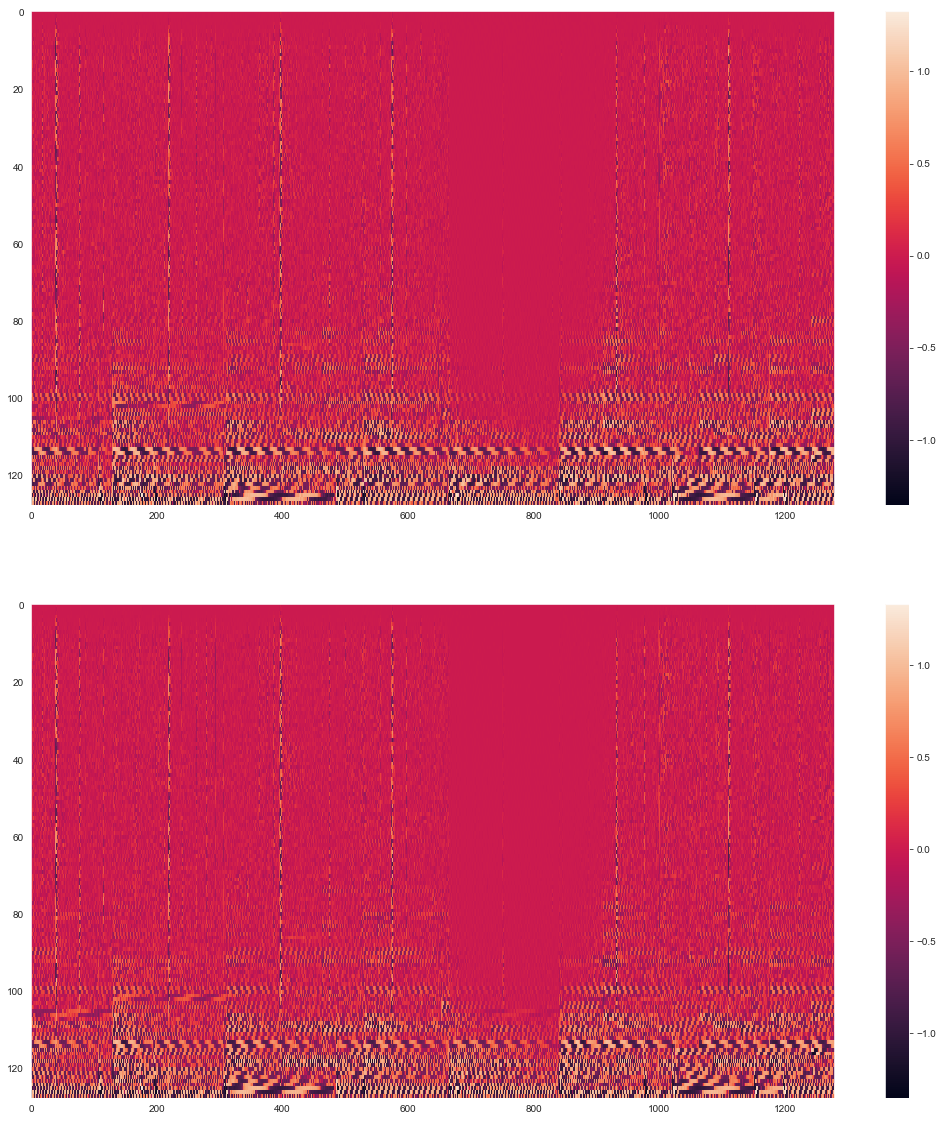

In [17]:
specvis_stereo(loaded[::-1, 2560:3840])

In [18]:
properly_saved = np.allclose(loaded, mdct_mu_lofi) and (loaded.dtype == 'float32')
print(f'It is {properly_saved} that the mu-law compressed MDCT-ed lofi music has been saved correctly.')

It is True that the mu-law compressed MDCT-ed lofi music has been saved correctly.


In [19]:
loaded.shape

(128, 450017, 2)